The problem I undertook is to create a genetic algorithm that will provide solutions to the boards in the Light-up game. The game takes place on a square board consisting of black and white fields. The player can place light bulbs on the white squares. One bulb illuminates all the white fields that are in the path of the bulb in the column and row (up, down, left, right). Bulbs cannot shine on each other (Each row and column can have a maximum of one bulb, unless they are separated by black boxes). Additionally, in some black fields there are numbers that determine the number of bulbs that should be adjacent to the walls of a given field. The aim of the game is to illuminate all white squares with light bulbs, taking into account the above-mentioned conditions.

The rules seem a bit complicated at first glance, but it's best to understand them in practice. https://www.puzzle-light-up.com/ The link takes you to the browser version of the game, from which the levels for testing the algorithm are copied.   

# Board coding

# 7x7 easy

In [1]:
seven_easy=[[5,5,5,5,5,5,5,5,5],
            [5,5,6,6,6,5,6,5,5],
            [5,6,3,6,6,6,5,6,5],
            [5,1,6,6,6,6,6,6,5],
            [5,6,6,6,6,6,6,6,5],
            [5,6,6,6,6,6,6,3,5],
            [5,6,5,6,6,6,2,6,5],
            [5,5,6,1,6,6,6,5,5],
            [5,5,5,5,5,5,5,5,5]]

seven_easy_2=[[5,5,5,5,5,5,5,5,5],
              [5,6,6,6,0,6,6,6,5],
              [5,6,6,1,6,6,6,6,5],
              [5,6,6,5,6,1,0,6,5],
              [5,0,6,6,6,6,6,5,5],
              [5,6,1,2,6,5,6,6,5],
              [5,6,6,6,6,2,6,6,5],
              [5,6,6,6,5,6,6,6,5],
              [5,5,5,5,5,5,5,5,5]]

seven_easy_3=[[5,5,5,5,5,5,5,5,5],
              [5,6,6,6,6,6,2,6,5],
              [5,1,6,1,6,6,6,6,5],
              [5,6,6,6,6,6,0,6,5],
              [5,6,6,6,6,6,6,6,5],
              [5,6,2,6,6,6,6,6,5],
              [5,6,6,6,6,1,6,0,5],
              [5,6,5,6,6,6,6,6,5],
              [5,5,5,5,5,5,5,5,5]]

# 7x7 normal

In [2]:
seven_normal=[[5,5,5,5,5,5,5,5,5],
             [5,6,6,6,6,6,6,6,5],
             [5,6,6,6,1,6,6,6,5],
             [5,6,6,0,6,5,6,6,5],
             [5,6,1,6,6,6,3,6,5],
             [5,6,6,0,6,5,6,6,5],
             [5,6,6,6,2,6,6,6,5],
             [5,6,6,6,6,6,6,6,5],
             [5,5,5,5,5,5,5,5,5]]

seven_normal_2=[[5,5,5,5,5,5,5,5,5],
                [5,6,5,6,6,6,6,6,5],
                [5,6,6,6,5,5,6,0,5],
                [5,6,2,6,6,6,6,6,5],
                [5,6,5,6,6,6,0,6,5],
                [5,6,6,6,6,6,0,6,5],
                [5,5,6,5,2,6,6,6,5],
                [5,6,6,6,6,6,0,6,5],
                [5,5,5,5,5,5,5,5,5]]

seven_normal_3=[[5,5,5,5,5,5,5,5,5],
                [5,6,1,6,5,6,6,6,5],
                [5,6,6,6,1,6,6,1,5],
                [5,6,6,6,6,6,6,6,5],
                [5,5,5,6,0,6,1,5,5],
                [5,6,6,6,6,6,6,6,5],
                [5,3,6,6,5,6,6,6,5],
                [5,6,6,6,5,6,2,6,5],
                [5,5,5,5,5,5,5,5,5]]

# 7x7 hard

In [3]:
seven_hard=[[5,5,5,5,5,5,5,5,5],
            [5,6,6,6,2,6,6,6,5],
            [5,6,1,6,6,6,5,6,5],
            [5,6,6,6,6,6,6,6,5],
            [5,5,6,6,0,6,6,2,5],
            [5,6,6,6,6,6,6,6,5],
            [5,6,2,6,6,6,2,6,5],
            [5,6,6,6,1,6,6,6,5],
            [5,5,5,5,5,5,5,5,5]]


seven_hard_2=[[5,5,5,5,5,5,5,5,5],
              [5,6,6,6,6,5,6,6,5],
              [5,6,6,2,6,6,6,6,5],
              [5,2,6,6,6,6,2,6,5],
              [5,6,6,6,6,6,6,6,5],
              [5,6,0,6,6,6,6,1,5],
              [5,6,6,6,6,3,6,6,5],
              [5,6,6,5,6,6,6,6,5],
              [5,5,5,5,5,5,5,5,5]]

seven_hard_3=[[5,5,5,5,5,5,5,5,5],
              [5,6,6,6,6,2,6,6,5],
              [5,6,6,0,6,6,6,6,5],
              [5,5,6,6,6,6,2,6,5],
              [5,6,6,6,6,6,6,6,5],
              [5,6,1,6,6,6,6,1,5],
              [5,6,6,6,6,1,6,6,5],
              [5,6,6,0,6,6,6,6,5],
              [5,5,5,5,5,5,5,5,5]]

# 10x10 easy

In [4]:
ten_easy=[[5,5,5,5,5,5,5,5,5,5,5,5],
         [5,6,6,6,6,6,6,0,6,6,6,5],
         [5,6,6,6,6,1,6,6,6,6,6,5],
         [5,6,6,1,6,5,6,6,5,6,6,5],
         [5,2,6,6,2,6,6,5,6,6,6,5],
         [5,6,6,6,6,6,6,6,1,1,6,5],
         [5,6,1,2,6,6,6,6,6,6,6,5],
         [5,6,6,6,5,6,6,2,6,6,5,5],
         [5,6,6,1,6,6,0,6,2,6,6,5],
         [5,6,6,6,6,6,2,6,6,6,6,5],
         [5,6,6,6,5,6,6,6,6,6,6,5],
         [5,5,5,5,5,5,5,5,5,5,5,5]] 

ten_easy_2=[[5,5,5,5,5,5,5,5,5,5,5,5],
            [5,6,6,6,6,5,6,6,5,6,6,5],
            [5,6,1,6,6,6,6,1,6,2,6,5],
            [5,5,6,6,5,6,6,6,6,6,6,5],
            [5,6,3,6,6,6,6,6,1,6,6,5],
            [5,6,6,6,6,6,6,6,6,6,0,5],
            [5,5,6,6,6,6,6,6,6,6,6,5],
            [5,6,6,1,6,6,6,6,6,5,6,5],
            [5,6,6,6,6,6,6,1,6,6,5,5],
            [5,6,5,6,3,6,6,6,6,2,6,5],
            [5,6,6,3,6,6,2,6,6,6,6,5],
            [5,5,5,5,5,5,5,5,5,5,5,5]]


ten_easy_3=[[5,5,5,5,5,5,5,5,5,5,5,5],
            [5,6,6,6,6,5,6,6,6,6,6,5],
            [5,6,1,6,6,6,1,6,0,0,6,5],
            [5,6,0,1,6,6,6,6,5,6,6,5],
            [5,6,6,6,6,6,3,6,6,6,6,5],
            [5,6,1,6,2,6,6,6,6,6,5,5],
            [5,1,6,6,6,6,6,1,6,2,6,5],
            [5,6,6,6,6,5,6,6,6,6,6,5],
            [5,6,6,5,6,6,6,6,1,0,6,5],
            [5,6,2,5,6,5,6,6,6,3,6,5],
            [5,6,6,6,6,6,5,6,6,6,6,5],
            [5,5,5,5,5,5,5,5,5,5,5,5]]

ten_easy_4=[[5,5,5,5,5,5,5,5,5,5,5,5],
            [5,6,6,6,6,6,1,6,2,6,6,5],
            [5,6,6,6,5,6,6,6,6,6,6,5],
            [5,1,6,6,6,6,6,6,6,6,6,5],
            [5,6,6,6,4,6,6,1,6,1,6,5],
            [5,0,6,6,6,5,0,6,6,6,6,5],
            [5,6,6,6,6,5,5,6,6,6,1,5],
            [5,6,0,6,0,6,6,1,6,6,6,5],
            [5,6,6,6,6,6,6,6,6,6,5,5],
            [5,6,6,6,6,6,6,2,6,6,6,5],
            [5,6,6,5,6,5,6,6,6,6,6,5],
            [5,5,5,5,5,5,5,5,5,5,5,5]]

ten_easy_5=[[5,5,5,5,5,5,5,5,5,5,5,5],
            [5,5,6,6,6,6,0,6,2,6,2,5],
            [5,6,1,6,6,6,6,6,6,5,6,5],
            [5,2,6,6,6,5,6,6,6,6,6,5],
            [5,6,6,6,3,6,6,5,6,6,6,5],
            [5,5,6,6,6,6,6,6,5,6,6,5],
            [5,6,6,0,6,6,6,6,6,6,0,5],
            [5,6,6,6,5,6,6,5,6,6,6,5],
            [5,6,6,6,6,6,3,6,6,6,5,5],
            [5,6,2,6,6,6,6,6,6,5,6,5],
            [5,2,6,5,6,1,6,6,6,6,1,5],
            [5,5,5,5,5,5,5,5,5,5,5,5]]

# 10x10 normal

In [5]:
ten_normal=[[5,5,5,5,5,5,5,5,5,5,5,5],
            [5,6,6,6,0,6,6,2,6,6,6,5],
            [5,6,2,6,6,6,5,6,6,0,6,5],
            [5,6,6,6,6,6,6,6,6,6,6,5],
            [5,2,6,6,6,5,2,6,6,6,1,5],
            [5,6,2,6,5,6,6,5,6,6,6,5],
            [5,6,6,6,1,6,6,1,6,5,6,5],
            [5,5,6,6,6,5,0,6,6,6,5,5],
            [5,6,6,6,6,6,6,6,6,6,6,5],
            [5,6,2,6,6,3,6,6,6,2,6,5],
            [5,6,6,6,2,6,6,5,6,6,6,5],
            [5,5,5,5,5,5,5,5,5,5,5,5]]

ten_normal_2=[[5,5,5,5,5,5,5,5,5,5,5,5],
            [5,5,6,6,6,6,6,6,6,6,5,5],
            [5,6,0,6,6,5,5,6,1,5,6,5],
            [5,6,0,6,6,1,6,6,6,6,6,5],
            [5,6,6,6,6,6,6,6,6,6,6,5],
            [5,6,1,6,6,6,6,6,5,1,6,5],
            [5,6,0,0,6,6,6,6,6,5,6,5],
            [5,6,6,6,6,6,6,6,6,6,6,5],
            [5,6,6,6,6,6,2,6,6,5,6,5],
            [5,6,0,1,6,2,5,6,6,2,6,5],
            [5,5,6,6,6,6,6,6,6,6,5,5],
            [5,5,5,5,5,5,5,5,5,5,5,5]]

ten_normal_3=[[5,5,5,5,5,5,5,5,5,5,5,5],
            [5,6,6,6,6,5,6,6,6,6,6,5],
            [5,6,6,2,6,1,6,6,3,6,6,5],
            [5,6,1,6,6,5,6,6,6,5,6,5],
            [5,6,6,6,6,6,6,6,6,6,6,5],
            [5,6,6,6,6,6,6,6,5,5,2,5],
            [5,5,5,5,6,6,6,6,6,6,6,5],
            [5,6,6,6,6,6,6,6,6,6,6,5],
            [5,6,2,6,6,6,0,6,6,2,6,5],
            [5,6,6,3,6,6,5,6,1,6,6,5],
            [5,6,6,6,6,6,5,6,6,6,6,5],
            [5,5,5,5,5,5,5,5,5,5,5,5]]

# Board wizualization

In [6]:
import seaborn as sns
import pandas as pd

def color_map(val):
    """
    It accepts a value and returns a string based on it
    which will determine the color.
    For 5 black - black field without number
    For 6 gray - white field
    The remaining blue - black field with a number
    """
    if val == 5:
        color = 'black'
    elif val == 6:
        color = 'grey'
    else:
        color= 'blue'
    return 'color: %s' % color

In [7]:
#Board names to copy
seven_easy
seven_easy_2
seven_easy_3
seven_normal
seven_normal_2
seven_normal_3
seven_hard
seven_hard_2
seven_hard_3
ten_normal
ten_normal_2
ten_normal_3
ten_easy
ten_easy_2
ten_easy_3
ten_easy_4
ten_easy_5


y=pd.DataFrame(ten_normal_3)
y=y.style.applymap(color_map)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11
0,5,5,5,5,5,5,5,5,5,5,5,5
1,5,6,6,6,6,5,6,6,6,6,6,5
2,5,6,6,2,6,1,6,6,3,6,6,5
3,5,6,1,6,6,5,6,6,6,5,6,5
4,5,6,6,6,6,6,6,6,6,6,6,5
5,5,6,6,6,6,6,6,6,5,5,2,5
6,5,5,5,5,6,6,6,6,6,6,6,5
7,5,6,6,6,6,6,6,6,6,6,6,5
8,5,6,2,6,6,6,0,6,6,2,6,5
9,5,6,6,3,6,6,5,6,1,6,6,5


# Fitness Function

**In this section I will describe individual parts of the code, at the end there will be the whole thing to run**

Light-up is a game that can be won by meeting all the conditions on a given board. I decided that the most transparent approach would be to start with fitness = 0 and then reduce the fitness value for solutions that do not meet particular conditions.

# Fitness function in code

In [8]:
import pygad
import numpy as np
import copy
import time

In [9]:
#Sample board
l=seven_easy


def fitness_func(solution,solution_idx):
    length=len(l)
    fitness=0
       
    #At the beginning, the condition is to place light bulbs only on black fields
    for i in range(length):
        for j in range(length):
            num=i*length+j
            if l[i][j] != 6 and solution[num]==1:
                fitness = fitness -100
                
    
    #Here we set the condition that the surroundings of the black fields always contain the appropriate number of light bulbs
    for i in range(1,length-1):
        for j in range(1,length-1):
            
            if l[i][j] == 0:
                if sum([solution[i*length+j+length],solution[i*length+j-length],
                        solution[i*length+j-1],solution[i*length+j+1]]) == 0:
                       continue
                else:
                       fitness = fitness - 10         
            
            elif l[i][j] == 1:
                if sum([solution[i*length+j+length],solution[i*length+j-length],
                        solution[i*length+j-1],solution[i*length+j+1]]) == 1:
                       continue
                else:
                       fitness = fitness - 10
                
                       
            elif l[i][j] == 2:
                if sum([solution[i*length+j+length],solution[i*length+j-length],
                        solution[i*length+j-1],solution[i*length+j+1]]) == 2:
                       continue
                else:
                       fitness = fitness - 10
                       
                       
            elif l[i][j] == 3:
                if sum([solution[i*length+j+length],solution[i*length+j-length],
                        solution[i*length+j-1],solution[i*length+j+1]]) == 3:
                       continue
                else:
                       fitness = fitness - 10
                
            elif l[i][j] == 4:
                if sum([solution[i*length+j+length],solution[i*length+j-length],
                        solution[i*length+j-1],solution[i*length+j+1]]) == 4:
                       continue
                else:
                       fitness = fitness - 10
       
    #The most difficult thing here, is to ensure that there can be a maximum of 1 light bulb in one row and column
    
    l2=copy.deepcopy(l)
    
    for i in range(1,length-1):
        for j in range(1,length-1):
            if solution[i*length+j] == 1:
                l2[i][j]=7
                k=j+1
                while l[i][k]==6:
                    l2[i][k]=7
                    if solution[i*length+k] != 1:
                        k=k+1
                    else:
                        fitness=fitness-1
                        break
                h=i+1        
                while l[h][j]==6:
                    l2[h][j]=7
                    if solution[h*length+j] != 1:
                        h=h+1
                    else:
                        fitness=fitness-1
                        break
                k=j-1
                while l[i][k]==6:
                    l2[i][k]=7
                    if solution[i*length+k] != 1:
                        k=k-1
                    else:
                        fitness=fitness-1
                        break 
                h=i-1        
                while l[h][j]==6:
                    l2[h][j]=7
                    if solution[h*length+j] != 1:
                        h=h-1
                    else:
                        fitness=fitness-1
                        break        
                        
                        
    #Now the condition for replacing the missing bulbs
    blank=0
    for i in l:
        blank+=i.count(6) 
        
    blank2=0
    for i in l2:
        blank2+=i.count(7) 
        
    fitness=fitness-abs(blank-blank2)    
    
    return fitness                   
                    
fitness_function = fitness_func

# Test

Now I will run the above function on the solution to show that it works.

In [10]:
l=seven_easy
length=len(l)

solution=[0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 1, 0, 0,
         0, 1, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 1, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0]

fitness_func(solution,solution_idx=None)

0

# Wizualizacja wyniku

First, I turn the best solution into a regular list. Then I split it into a list of lists using the split function. This way we see the solution in matrix form.

In [11]:
def split(lst, n):
    """Splitting list into n smaller lists """
    ix = np.linspace(0, len(lst), n + 1, dtype=int)
    return [lst[i:j] for i, j in zip(ix[:-1], ix[1:])]

sol=split(solution,len(l))
sol

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

Now I add a color map to the solution list, which highlights the fields where the light bulbs are located. Then the map is placed on the board, so you can see where the light bulbs should be located on the board.

In [12]:
import matplotlib
import random
cm = sns.light_palette("yellow", as_cmap=True)

y=pd.DataFrame(l)
x=pd.DataFrame(sol)

def style(df):
    data = x.values
    data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))
    bg_colors = cm(data_normalized)
    bg_colors = np.apply_along_axis(matplotlib.colors.to_hex, 2, bg_colors)
    s = pd.DataFrame(bg_colors, columns=df.columns)
    for col in s.columns:
        s[col] = s[col].apply(lambda c: f'background-color:{c}')
    return s

s=y.style.apply(style, axis=None)
s

,0,1,2,3,4,5,6,7,8
0,5,5,5,5,5,5,5,5,5
1,5,5,6,6,6,5,6,5,5
2,5,6,3,6,6,6,5,6,5
3,5,1,6,6,6,6,6,6,5
4,5,6,6,6,6,6,6,6,5
5,5,6,6,6,6,6,6,3,5
6,5,6,5,6,6,6,2,6,5
7,5,5,6,1,6,6,6,5,5
8,5,5,5,5,5,5,5,5,5


Now a visualization showing which fields are highlighted. Below is the code copied from the fitness function to select the highlighted boxes. Unfortunately, I couldn't put everything on one color map, so I'm showing the result on two.

In [13]:
def second_list(solution):
    l2=copy.deepcopy(l)

    for i in range(1,length-1):
        for j in range(1,length-1):
            if solution[i*length+j] == 1:
                l2[i][j]=7
                k=j+1
                while l[i][k]==6:
                    l2[i][k]=7
                    if solution[i*length+k] != 1:
                        k=k+1
                    else:
                        break
                h=i+1        
                while l[h][j]==6:
                    l2[h][j]=7
                    if solution[h*length+j] != 1:
                        h=h+1
                    else:
                        break
                k=j-1
                while l[i][k]==6:
                    l2[i][k]=7
                    if solution[i*length+k] != 1:
                        k=k-1
                    else:
                        break 
                h=i-1        
                while l[h][j]==6:
                    l2[h][j]=7
                    if solution[h*length+j] != 1:
                        h=h-1
                    else:
                        break 
    x = pd.DataFrame(l2)
    x[x != 7] = 0
    return x

x=second_list(solution)
cm1 = sns.light_palette("orange", as_cmap=True)

y=pd.DataFrame(l)


def style2(df):
    data = x.values
    data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))
    bg_colors = cm1(data_normalized)
    bg_colors = np.apply_along_axis(matplotlib.colors.to_hex, 2, bg_colors)
    s = pd.DataFrame(bg_colors, columns=df.columns)
    for col in s.columns:
        s[col] = s[col].apply(lambda c: f'background-color:{c}')
    return s

y.style.apply(style2, axis=None)

,0,1,2,3,4,5,6,7,8
0,5,5,5,5,5,5,5,5,5
1,5,5,6,6,6,5,6,5,5
2,5,6,3,6,6,6,5,6,5
3,5,1,6,6,6,6,6,6,5
4,5,6,6,6,6,6,6,6,5
5,5,6,6,6,6,6,6,3,5
6,5,6,5,6,6,6,2,6,5
7,5,5,6,1,6,6,6,5,5
8,5,5,5,5,5,5,5,5,5


# Parameters

After several tests, it turned out that the parameters in the following configuration provide the best results.
It is also very important to set appropriate fitness reducing values in the fitness function.
In fact, changing these values affected the result more than the parameters set in the pygad library.

**The following section is for running the algorithm and visualizing the results**

In [37]:
#Board names to copy
seven_easy
seven_easy_2
seven_easy_3
seven_normal
seven_normal_2
seven_normal_3
seven_hard
seven_hard_2
seven_hard_3
ten_easy
ten_easy_2
ten_easy_3
ten_easy_4


#Here we enter name o
l=seven_easy

length=len(l)

gene_space=[0,1]
num_genes = length**2



sol_per_pop = 500
num_parents_mating = 250
num_generations = 50
keep_parents = 25

parent_selection_type = "rank"
crossover_type = "uniform"

mutation_type = "swap"

mutation_percent_genes = 20

fitness_func=fitness_func

ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes,
                            stop_criteria=["reach_0"])


Parameters of the best solution : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Fitness value of the best solution = -2


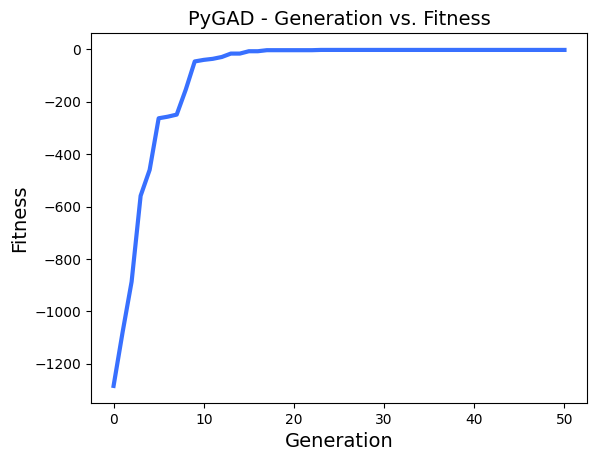

In [38]:
ga_instance.run()
#Summary: best solution (chromosom+mark)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
ga_instance.plot_fitness()
print()

In [16]:
solution1=solution.tolist()
solution2=list(map(int, solution1)) 
sol=split(solution2,len(l))
y=pd.DataFrame(l)
x=pd.DataFrame(sol)
s=y.style.apply(style, axis=None)
s

,0,1,2,3,4,5,6,7,8
0,5,5,5,5,5,5,5,5,5
1,5,6,6,6,0,6,6,6,5
2,5,6,6,1,6,6,6,6,5
3,5,6,6,5,6,1,0,6,5
4,5,0,6,6,6,6,6,5,5
5,5,6,1,2,6,5,6,6,5
6,5,6,6,6,6,2,6,6,5
7,5,6,6,6,5,6,6,6,5
8,5,5,5,5,5,5,5,5,5


In [17]:
x=second_list(solution)
y=pd.DataFrame(l)
y.style.apply(style2, axis=None)

,0,1,2,3,4,5,6,7,8
0,5,5,5,5,5,5,5,5,5
1,5,6,6,6,0,6,6,6,5
2,5,6,6,1,6,6,6,6,5
3,5,6,6,5,6,1,0,6,5
4,5,0,6,6,6,6,6,5,5
5,5,6,1,2,6,5,6,6,5
6,5,6,6,6,6,2,6,6,5
7,5,6,6,6,5,6,6,6,5
8,5,5,5,5,5,5,5,5,5


# Effectiveness

In [18]:
fitness_func=fitness_func
length=len(l)
gene_space=[0,1]
num_genes = length**2

sol_per_pop = 500
num_parents_mating = 250
num_generations = 50
keep_parents = 25

parent_selection_type = "rank"
crossover_type = "uniform"
mutation_type = "swap"

mutation_probability = 0.25


#Lists with difficulty level and size
Lista=[seven_easy,seven_easy_2,seven_easy_3]
Lista2=[seven_normal,seven_normal_2,seven_normal_3]
Lista3=[ten_easy,ten_easy_2,ten_easy_3]

count=[]
count1=0
count2=0
for i in range (1):
    start=time.time()
    l=random.choice(Lista)
    
    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes,
                            stop_criteria=["reach_0"])



    
    ga_instance.run()
    solution, solution_fitness, solution_idx= ga_instance.best_solution()
    best_solution_generation=ga_instance.best_solution_generation
    end=time.time()
    if solution_fitness ==0:
        count1+=1
        count.append(end-start)
    if solution_fitness >= -3:
        count2+=1
    print(solution_fitness,i)
print(np.mean(count),count1,count2)

-5 0
nan 0 0


D:\Anaconda\envs\New env\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Anaconda\envs\New env\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Settings for the experiment: 7x7 normal and 7x7 easy and 10x10 easy sol_per_pop = 500 num_parents_mating = 250 num_generations = 50 keep_parents = 25


**Results 7x7 easy:**
Unfortunately, the algorithm has poor efficiency for 7x7 easy boards, the perfect solution was found 30 times out of 100. Additionally, I checked how often the value of the fitness function was at least -3 and here it happened 76 times out of a hundred. The average time to find a good solution is 4.86 seconds.

After such results on the easiest boards, I decided to conduct further tests on the 7x7 normal and 10x10 easy inputs. I myself have played at different difficulty levels of the boards and I know that they actually took me proportionally more time with the higher level of difficulty, so examining inputs of different difficulty makes sense.

**7x7 normal**
For 7x7 normal boards, the perfect solution was found 14 times out of 100.
The fitness function value was at least -3.84 times out of 100.
The average time to find a good solution is 4.38 seconds

**10x10 easy**
It was not possible to find a perfect solution for 10x10 boards
18 times out of a hundred the fitness function achieved a value of -3 or higher.

For all boards, I decided to use the same population settings because the calculations took quite a long time anyway.

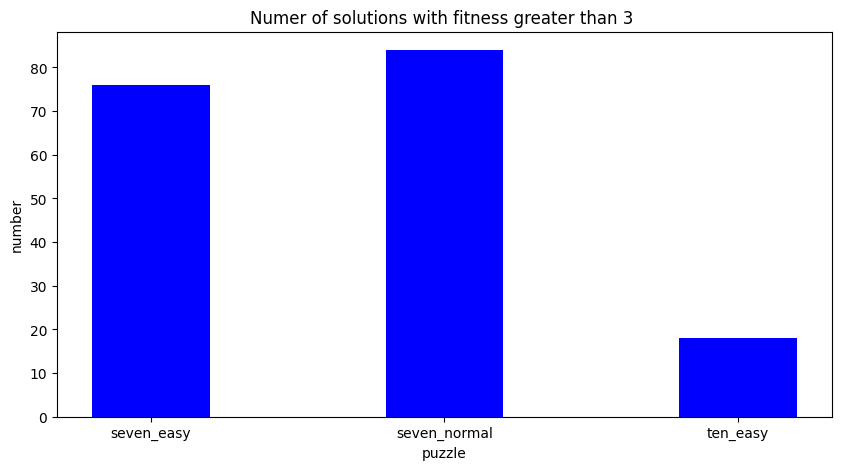

In [19]:
import matplotlib.pyplot as plt
X=['seven_easy','seven_normal','ten_easy']

Sol_greater_than_3={'seven_easy':76,'seven_normal':84,'ten_easy':18}
ideal_sol={'seven_easy':30,'seven_normal':14,'ten_easy':0}
time={'seven_easy':4.86,'seven_normal':4.38,'ten_easy':0}

keys = list(Sol_greater_than_3.keys())
values = list(Sol_greater_than_3.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys, values, color ='blue',
        width = 0.4)
 
plt.xlabel("puzzle")
plt.ylabel("number")
plt.title("Numer of solutions with fitness greater than 3 ")
plt.show()

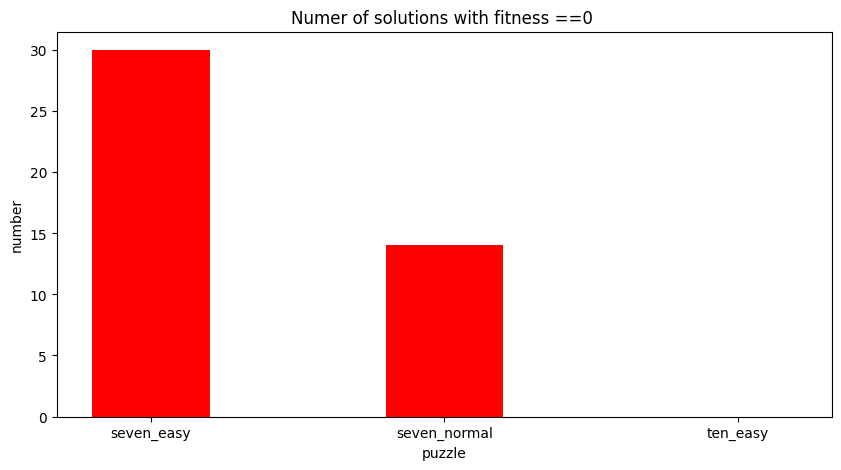

In [20]:
keys = list(ideal_sol.keys())
values = list(ideal_sol.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys, values, color ='red',
        width = 0.4)
 
plt.xlabel("puzzle")
plt.ylabel("number")
plt.title("Numer of solutions with fitness ==0 ")
plt.show()

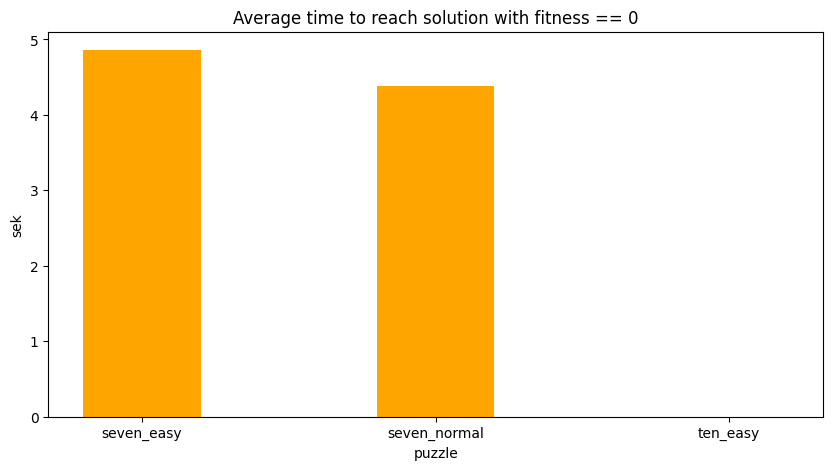

In [21]:
keys = list(time.keys())
values = list(time.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys, values, color ='orange',
        width = 0.4)
 
plt.xlabel("puzzle")
plt.ylabel("sek")
plt.title("Average time to reach solution with fitness == 0")
plt.show()

# Particle Swarm Optimizer

As an alternative solution, I decided to test the pyswarm library. In my case, the solution is binary, hence the need to use 'ps.discrete.BinaryPSO'.  I have used the same fitness function as in previous excample.

In [22]:
import pyswarms as ps

In [23]:
def fitness_func_2(solution):
    length=len(l)
    fitness=0
       
    
    for i in range(length):
        for j in range(length):
            num=i*length+j
            if l[i][j] != 6 and solution[num]==1:
                fitness = fitness -100
                
    
    
    for i in range(1,length-1):
        for j in range(1,length-1):
            
            if l[i][j] == 0:
                if sum([solution[i*length+j+length],solution[i*length+j-length],
                        solution[i*length+j-1],solution[i*length+j+1]]) == 0:
                       continue
                else:
                       fitness = fitness - 10        
            
            elif l[i][j] == 1:
                if sum([solution[i*length+j+length],solution[i*length+j-length],
                        solution[i*length+j-1],solution[i*length+j+1]]) == 1:
                       continue
                else:
                       fitness = fitness -10
                
                       
            elif l[i][j] == 2:
                if sum([solution[i*length+j+length],solution[i*length+j-length],
                        solution[i*length+j-1],solution[i*length+j+1]]) == 2:
                       continue
                else:
                       fitness = fitness - 10
                       
                       
            elif l[i][j] == 3:
                if sum([solution[i*length+j+length],solution[i*length+j-length],
                        solution[i*length+j-1],solution[i*length+j+1]]) == 3:
                       continue
                else:
                       fitness = fitness - 10
                
            elif l[i][j] == 4:
                if sum([solution[i*length+j+length],solution[i*length+j-length],
                        solution[i*length+j-1],solution[i*length+j+1]]) == 4:
                       continue
                else:
                       fitness = fitness - 10
       
   
    
    l2=copy.deepcopy(l)
    
    for i in range(1,length-1):
        for j in range(1,length-1):
            if solution[i*length+j] == 1:
                l2[i][j]=7
                k=j+1
                while l[i][k]==6:
                    l2[i][k]=7
                    if solution[i*length+k] != 1:
                        k=k+1
                    else:
                        fitness=fitness-1
                        break
                h=i+1        
                while l[h][j]==6:
                    l2[h][j]=7
                    if solution[h*length+j] != 1:
                        h=h+1
                    else:
                        fitness=fitness-1
                        break
                k=j-1
                while l[i][k]==6:
                    l2[i][k]=7
                    if solution[i*length+k] != 1:
                        k=k-1
                    else:
                        fitness=fitness-1
                        break 
                h=i-1        
                while l[h][j]==6:
                    l2[h][j]=7
                    if solution[h*length+j] != 1:
                        h=h-1
                    else:
                        fitness=fitness-1
                        break        
                        
                        
    blank=0
    for i in l:
        blank+=i.count(6) 
        
    blank2=0
    for i in l2:
        blank2+=i.count(7) 
        
    fitness=fitness-abs(blank-blank2)    
    
    return -fitness                   
                    
fitness_function = fitness_func

Now a function that will allow to run the swarm algorithm on the fitness function

In [24]:
def f(x):
    n_particles = x.shape[0]
    j = [fitness_func_2(x[i]) for i in range(n_particles)]
    return np.array(j)

In [25]:
l=seven_easy_3
dimensions = int(len(l)**2)
optimizer = ps.discrete.BinaryPSO(n_particles=100, dimensions=dimensions, options={'c1': 100, 'c2': 30, 'w': 0.9, 'k':5, 'p':1})
                                 
cost, pos=optimizer.optimize(f, 500)

2023-04-03 21:14:47,702 - pyswarms.discrete.binary - INFO - Optimize for 500 iters with {'c1': 100, 'c2': 30, 'w': 0.9, 'k': 5, 'p': 1}
pyswarms.discrete.binary: 100%|██████████|500/500, best_cost=1   
2023-04-03 21:14:58,207 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 1.0, best pos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0]


In [26]:
solution1=pos.tolist()
solution2=list(map(int, solution1)) 
sol=split(solution2,len(l))
sol

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [27]:
y=pd.DataFrame(l)
x=pd.DataFrame(sol)
s=y.style.apply(style, axis=None)
s

,0,1,2,3,4,5,6,7,8
0,5,5,5,5,5,5,5,5,5
1,5,6,6,6,6,6,2,6,5
2,5,1,6,1,6,6,6,6,5
3,5,6,6,6,6,6,0,6,5
4,5,6,6,6,6,6,6,6,5
5,5,6,2,6,6,6,6,6,5
6,5,6,6,6,6,1,6,0,5
7,5,6,5,6,6,6,6,6,5
8,5,5,5,5,5,5,5,5,5


In [28]:
x=second_list(pos)
y=pd.DataFrame(l)
y.style.apply(style2, axis=None)

,0,1,2,3,4,5,6,7,8
0,5,5,5,5,5,5,5,5,5
1,5,6,6,6,6,6,2,6,5
2,5,1,6,1,6,6,6,6,5
3,5,6,6,6,6,6,0,6,5
4,5,6,6,6,6,6,6,6,5
5,5,6,2,6,6,6,6,6,5
6,5,6,6,6,6,1,6,0,5
7,5,6,5,6,6,6,6,6,5
8,5,5,5,5,5,5,5,5,5


# Swarm Effectiveness

In [29]:
Lista=[seven_easy,seven_easy_2,seven_easy_3]
Lista2=[seven_normal,seven_normal_2,seven_normal_3]
Lista3=[ten_easy,ten_easy_2,ten_easy_3,ten_easy_4,ten_easy_5]
Lista4=[seven_hard,seven_hard_2,seven_hard_3]
Lista5=[ten_normal,ten_normal_2,ten_normal_3]

In [30]:
import time
count=0
count2=0
time_count=[]
for i in range(1):
    print(i)
    l=random.choice(Lista)
    dimensions = int(len(l)**2)
    start=time.time()
    optimizer = ps.discrete.BinaryPSO(n_particles=100, dimensions=dimensions, options={'c1': 100, 'c2': 30, 'w': 0.9, 'k':5, 'p':1})
    cost, pos=optimizer.optimize(f, 500)
    end=time.time()
    time_count.append(end-start)
    if cost == 0:
        count+=1
    if cost <= 3:
        count2+=1 
print(count,count2,np.mean(time_count))        

2023-04-03 21:14:58,341 - pyswarms.discrete.binary - INFO - Optimize for 500 iters with {'c1': 100, 'c2': 30, 'w': 0.9, 'k': 5, 'p': 1}


0


pyswarms.discrete.binary: 100%|██████████|500/500, best_cost=1   
2023-04-03 21:15:08,921 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 1.0, best pos: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0]


0 1 10.60415005683899


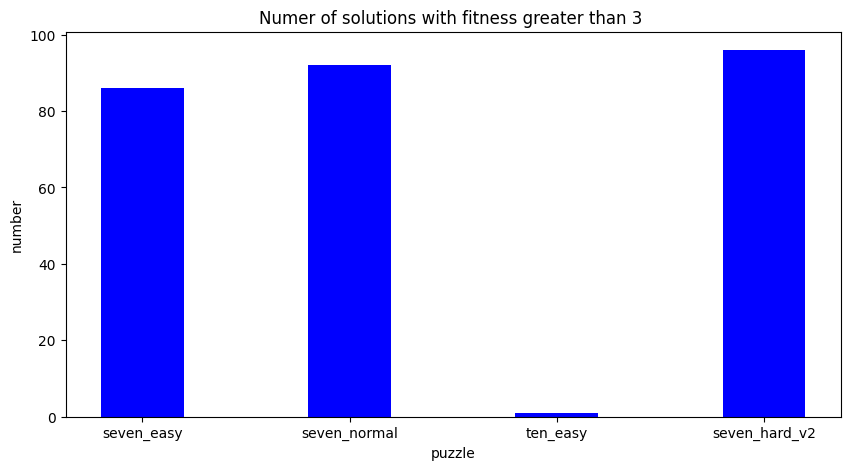

In [31]:
X=['seven_easy','seven_normal','seven_hard','seven_hard_v2','ten_easy']

Sol_greater_than_3_swarm={'seven_easy':86,'seven_normal':92,'ten_easy':1,'seven_hard_v2':96}
ideal_sol_swarm={'seven_easy':27,'seven_normal':31,'ten_easy':0,'seven_hard_v2':28}
#time={'seven_easy':4.86,'seven_normal':4.38,'ten_easy':0}

keys = list(Sol_greater_than_3_swarm.keys())
values = list(Sol_greater_than_3_swarm.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys, values, color ='blue',
        width = 0.4)
 
plt.xlabel("puzzle")
plt.ylabel("number")
plt.title("Numer of solutions with fitness greater than 3 ")
plt.show()

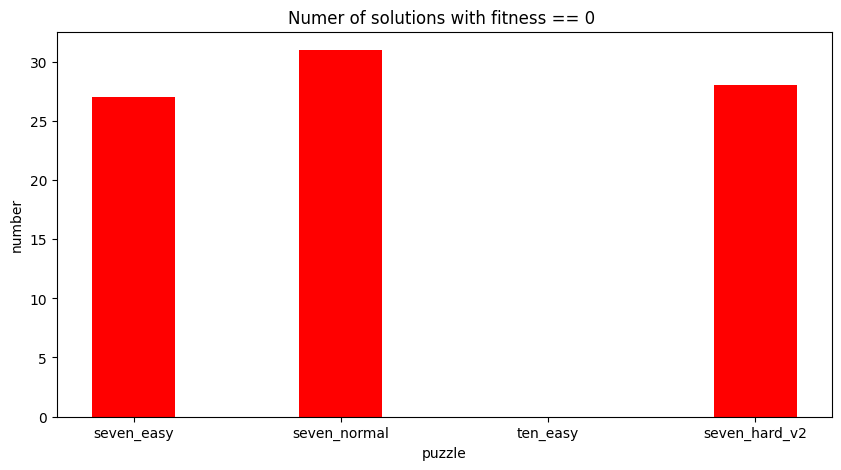

In [32]:
keys = list(ideal_sol_swarm.keys())
values = list(ideal_sol_swarm.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys, values, color ='red',
        width = 0.4)
 
plt.xlabel("puzzle")
plt.ylabel("number")
plt.title("Numer of solutions with fitness == 0 ")
plt.show()